In [28]:
import numpy as np
import pyod.utils.data as data
import matplotlib.pyplot as plt

In [3]:
#Exercitiul 1
random_state = 42 

gen_data= data.generate_data(n_train=400,n_test=100,n_features=2,contamination=0.1,random_state=random_state)

X_train, X_test, Y_train, Y_test = gen_data

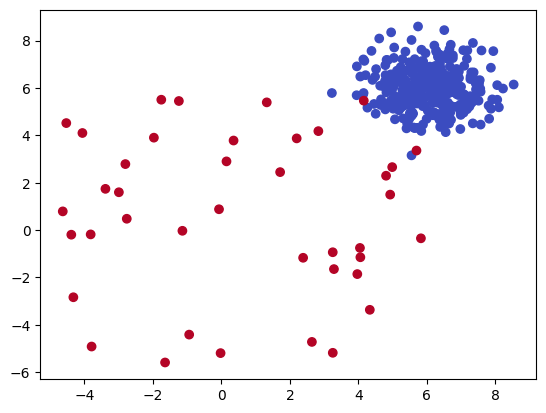

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap="coolwarm")
plt.show()


In [34]:
from pyod.models.knn import KNN
from sklearn.metrics import confusion_matrix, balanced_accuracy_score
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

In [14]:
#Exercitiul 2
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [15]:
y_train_pred = clf.labels_  
y_train_scores = clf.decision_scores_  

In [16]:
y_test_pred = clf.predict(X_test)  
y_test_scores = clf.decision_function(X_test) 

In [41]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_test_pred).ravel()
tpr = tp/(tp+fn)
tnr = tn/(tn+fp)
ba = (tpr+ tnr)/2
print(ba)

0.95


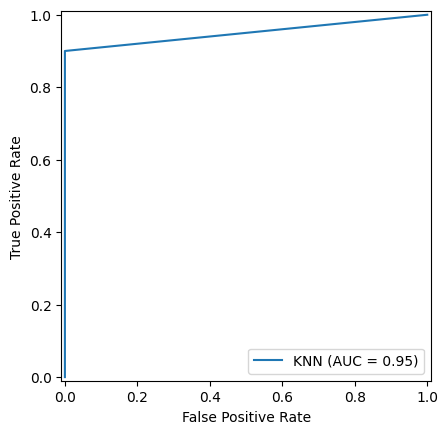

In [30]:
fpr, tpr, thresholds = roc_curve(Y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='KNN')
display.plot()
plt.show()

In [31]:
#Exercitiul 3

random_state = 42 

gen_data_1= data.generate_data(n_train=1000,n_test=0,n_features=1,contamination=0.1,random_state=random_state)

X_train, _, Y_train, _ = gen_data_1

mean= np.mean(X_train)

std_deviation = np.std(X_train)

z_scores =(X_train - mean) / std_deviation

In [38]:
threshold = np.quantile(z_scores, 0.9)

y_train_pred = np.where(np.abs(z_scores) > threshold, 1, 0)  

In [44]:
tn1, fp1, fn1, tp1 = confusion_matrix(Y_train, y_train_pred).ravel()

ba_1 = balanced_accuracy_score(Y_train, y_train_pred)

print(ba_1)

0.8033333333333333


In [ ]:
#Exercitiul 4